<a href="https://colab.research.google.com/github/Carsonn-Chen/BINF-5220/blob/main/Liu_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 5: categorical data and imputation

## import modules

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
figsize = (10, 6.5)
plt.rcParams.update({'font.size': 22})

Mounted at /content/gdrive


## read data

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/BINF 5220/data/preprocessing_sample_data_missing_vals_new.csv", index_col=0)
df.head()

,weight_kg,overall_length_mm,variety,avg_rating
0,NaN,291.068237,1,216.921532
1,0.008966,178.648431,1,314.967587
2,0.003654,NaN,1,178.361162
3,NaN,130.146299,0,476.198690
4,0.005907,NaN,0,380.775044


## Split the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

np.random.seed(5)
fitting_df, test_df = train_test_split(df, test_size=0.25)

### omit data

In [ ]:
fitting_df_no_missing = fitting_df.dropna()
test_df_no_missing = test_df.dropna()

print(len(fitting_df), len(test_df))
print("fitting now:", len(fitting_df_no_missing))
print("testing now", len(test_df_no_missing))

75 25
fitting now: 46
testing now 12


rows were lost from fitting: 75-46=29

rows were lost from test: 25-12=13

### Check unique values in the 'variety' column

In [ ]:
print("Original fitting data:", df['variety'].unique())
print("Original testing data:", fitting_df['variety'].unique())
print("Dropped fitting data:", fitting_df_no_missing['variety'].unique())
print("Dropped testing data:", test_df_no_missing['variety'].unique())

Original fitting data: [1 0 2]
Original testing data: [2 1 0]
Dropped fitting data: [2 1 0]
Dropped testing data: [2 0 1]


### one-hot encoding

In [ ]:
fitting_df_onehot = pd.get_dummies(fitting_df, columns=['variety'])
test_df_onehot = pd.get_dummies(test_df, columns=['variety'])
fitting_df_no_missing_onehot = pd.get_dummies(fitting_df_no_missing, columns=['variety'])
test_df_no_missing_onehot = pd.get_dummies(test_df_no_missing, columns=['variety'])

### Create an sklearn pipeline

In [ ]:
pp1 = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), Ridge(alpha=0.01))
pp1.fit(fitting_df_onehot.drop('avg_rating', axis=1), fitting_df_onehot['avg_rating'])
print('score', pp1.score(test_df_onehot.drop('avg_rating', axis=1), test_df_onehot['avg_rating']))

score 0.8294594268568696


### Create another equivalent pipeline

In [ ]:
pp2 = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), Ridge(alpha=0.01))
pp2.fit(fitting_df_no_missing_onehot.drop('avg_rating', axis=1), fitting_df_no_missing_onehot['avg_rating'])
print('score', pp2.score(test_df_no_missing_onehot.drop('avg_rating', axis=1), test_df_no_missing_onehot['avg_rating']))

score 0.9310107520336671


### Make a scatterplot

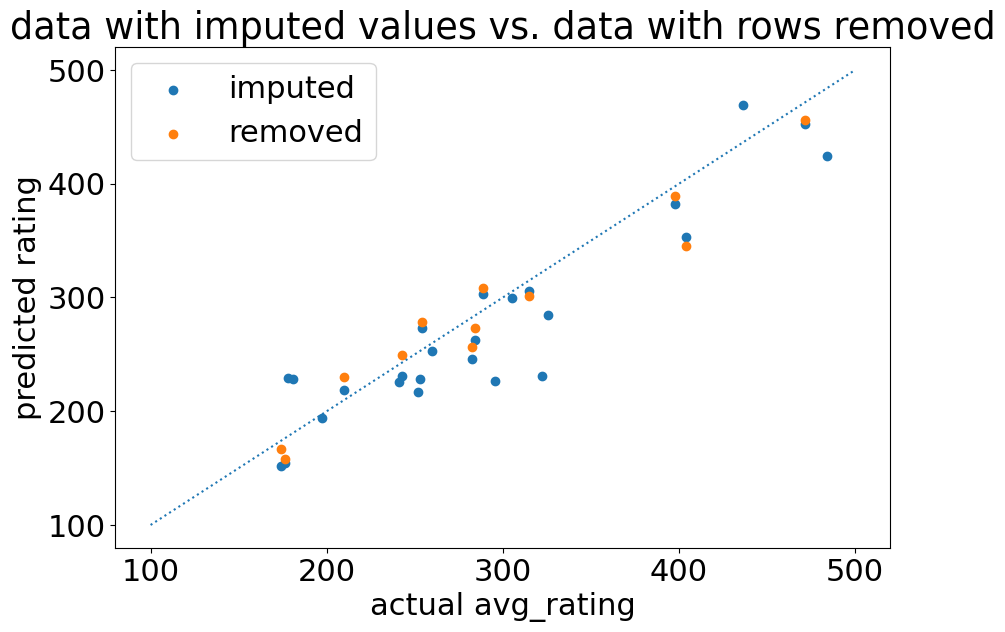

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(test_df_onehot['avg_rating'], pp1.predict(test_df_onehot.drop('avg_rating', axis=1)), label='imputed')
ax.scatter(test_df_no_missing_onehot['avg_rating'], pp2.predict(test_df_no_missing_onehot.drop('avg_rating', axis=1)), label='removed')
ax.set_xlabel("actual avg_rating")
ax.set_ylabel("predicted rating")
ax.set_title('data with imputed values vs. data with rows removed')
ax.plot([100,500],[100,500], ':')
ax.legend()
plt.show()


## Part 2: k-NN vs. mean imputer

### import module

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
figsize = (10, 6.5)
plt.rcParams.update({'font.size': 22})

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### read data

In [ ]:
df2 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/BINF 5220/data/preprocessing_sample_data_missing_vals_alt.csv", index_col=0)
df2.head()

,weight_kg,overall_length_mm,price,avg_rating
0,3.143428,1.490927,2.895001,6.400798
1,10.237233,9.644184,9.635325,30.665897
2,10.547104,11.105189,NaN,36.543178
3,10.655396,10.214400,NaN,33.211331
4,9.180312,NaN,12.319402,30.861946


### Plot histograms

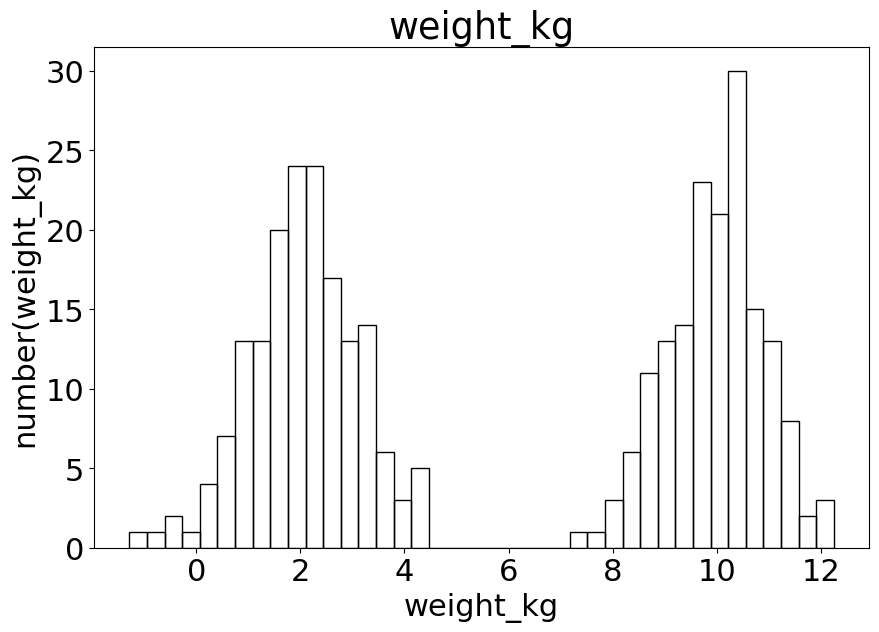

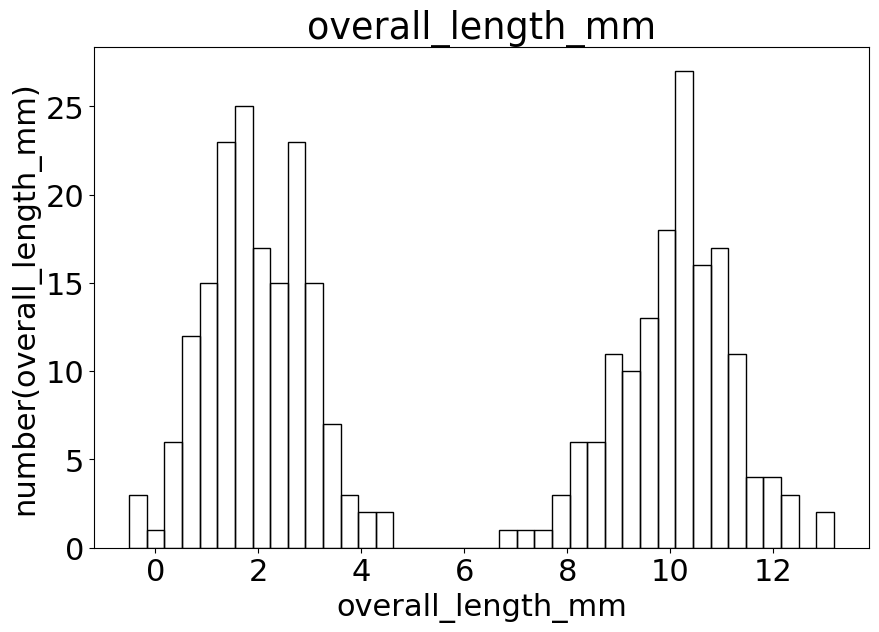

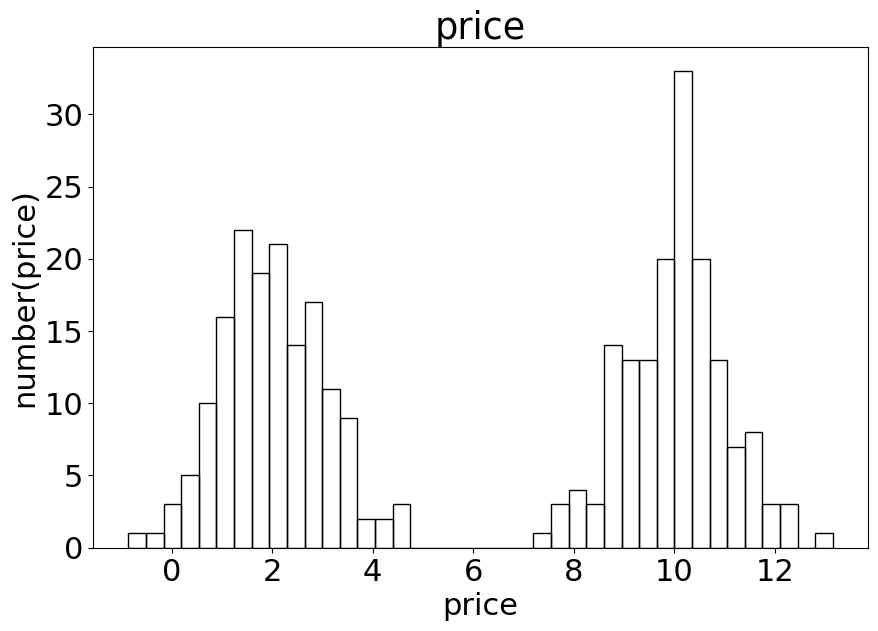

In [ ]:
def dis_plot(x):
  fig, ax = plt.subplots(figsize=figsize)
  ax.hist(df2[x].values, bins=40, fill=False)
  ax.set_title(x)
  ax.set_xlabel(x)
  ax.set_ylabel(f'number({x})')
  fig.show()

dis_plot('weight_kg')
dis_plot('overall_length_mm')
dis_plot('price')

### split data

In [ ]:
np.random.seed(5)
df2_fit, df2_test = train_test_split(df2, test_size = 0.25)

### two pipelines

In [ ]:
from sklearn.impute import KNNImputer


pp3 = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), Ridge(alpha=0.01))
pp3.fit(df2_fit.drop('avg_rating', axis=1), df2_fit['avg_rating'])
print('mean score', pp3.score(df2_test.drop('avg_rating', axis=1), df2_test['avg_rating']))

pp4 = make_pipeline(KNNImputer(n_neighbors=5),StandardScaler(), Ridge(alpha=0.01))
pp4.fit(df2_fit.drop('avg_rating', axis=1), df2_fit['avg_rating'])
print('K-NN score', pp4.score(df2_test.drop('avg_rating', axis=1), df2_test['avg_rating']))

mean score 0.8793927477274321
K-NN score 0.9300514180958818


### scatter plot

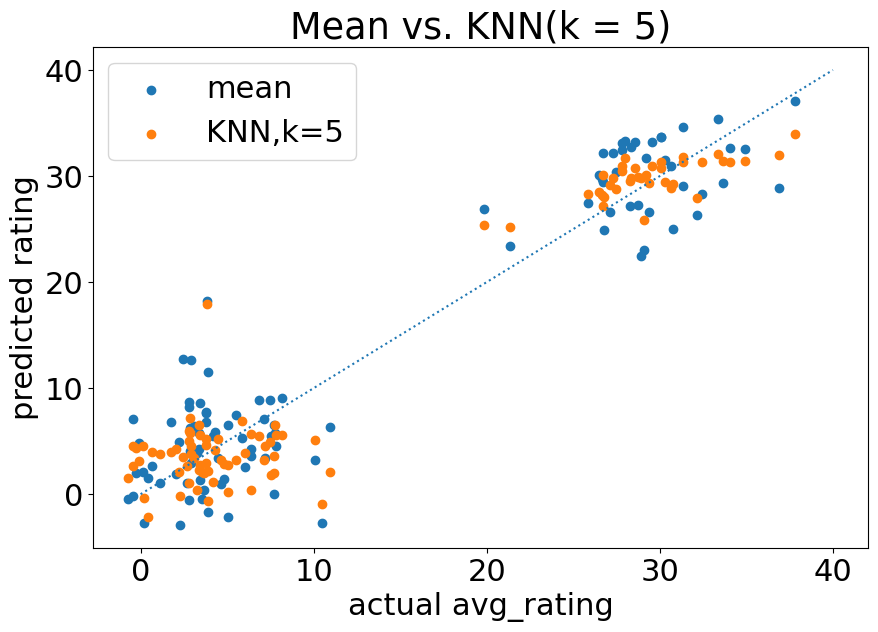

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df2_test['avg_rating'], pp3.predict(df2_test.drop('avg_rating', axis=1)), label='mean')
ax.scatter(df2_test['avg_rating'], pp4.predict(df2_test.drop('avg_rating', axis=1)), label='KNN,k=5')
ax.set_xlabel("actual avg_rating")
ax.set_ylabel("predicted rating")
ax.set_title('Mean vs. KNN(k = 5)')
ax.plot([0,40],[0,40], ':')
ax.legend()
plt.show()

I think the KNN method performs better. It scores higher and is closer to the baseline in the graph.The difference is due to the outcome of imputing data on this distribution.From the histograms it can be seen that the distribution of this set of data forms two peaks. Using the mean to fill in the missing values has a greater effect on their variance and distribution, introducing a larger error.